In [1]:
import pandas_datareader as pdr

# 1번 방법
# DataReader API를 통해서 yahoo finance의 주식 종목 데이터를 가져온다.
df = pdr.DataReader('005930.KS', 'yahoo')

# 2번 방법
# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
# df = pdr.get_data_yahoo('주식 종목코드')

# 선택적으로 일정 기간동안의 주식 정보를 가져오는 방법입니다.
from datetime import datetime
start = datetime(2020,6,1)
end = datetime(2020,6,15)
df = pdr.DataReader('005930.KS', 'yahoo', start, end)
df = pdr.get_data_yahoo('005930.KS', start, end)

In [2]:
import pandas as pd
import pandas_datareader as pdr

# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)

    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code

# excel 파일을 다운로드하는거와 동시에 pandas에 load하기
# 흔히 사용하는 df라는 변수는 data frame을 의미합니다.
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

# data frame정리
code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

# 종목코드는 6자리로 구분되기때문에 0을 채워 6자리로 변경
code_df.code = code_df.code.map('{:06d}'.format)

# ex) 삼성전자의의 코드를 구해보겠습니다.
code = get_code(code_df, '삼성전자')

# yahoo의 주식 데이터 종목은 코스피는 .KS, 코스닥은 .KQ가 붙습니다.
# 삼성전자의 경우 코스피에 상장되어있기때문에 '종목코드.KS'로 처리하도록 한다.
code = code + '.KS'

# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
df = pdr.get_data_yahoo(code)

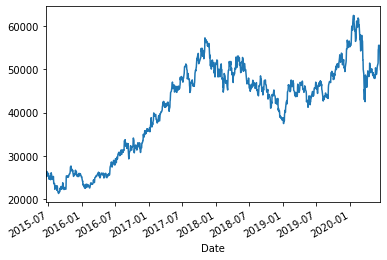

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['Close'].plot()

In [7]:
import pandas as pd
import pandas_datareader as pdr

# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)

    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code

# download url 조합
def get_download_stock(market_type=None):
    market_type = stock_type[market_type]
    download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
    download_link = download_link + '?method=download'
    download_link = download_link + '&marketType=' + market_type
    
    df = pd.read_html(download_link, header=0)[0]
    return df;

# kospi 종목코드 목록 다운로드
def get_download_kospi():
    df = get_download_stock('kospi')
    df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
    return df

# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
    df = get_download_stock('kosdaq')
    df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
    return df

# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()

# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])

# data frame정리
code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})


comp_list = [
    '지트리비앤티',
    '카카오',
    '에이치엘비파워',
]

for comp in comp_list:
    
    # code = get_code(code_df, '삼성전자')
    code = get_code(code_df, comp)

    # get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
    df = pdr.get_data_yahoo(code)
    df = df.reset_index()
    
    df.to_csv('./'+comp+'.csv', 
          sep=',', 
          float_format='%.6f', # 2 decimal places
          columns=df.columns, # columns to write
          index=False) # do not write index

In [39]:
# df.to_csv('./삼성전자.csv', 
#           sep=',', 
#           float_format='%.6f', # 2 decimal places
#           columns=df.columns, # columns to write
#           index=False) # do not write index